In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import collections

%matplotlib inline


Students:
* Emilio Tylson Baixauli
* Alfons Córdoba Meneses

# Network dataset

We have decided to work with MovieLens dataset of 100k entries. This dataset contains 100k user ratings of movies.
Following we explore the datset in order to model it as a graph/network.
The main idea is to model the dataset as bipartite network where there is one class represented by user and a class of movies. The edges represent that a user rated a movie. On possibility is that the network could be weighted by the user's rating but in this first iteration we decided to model the network without weights. 

The dataset is partitioned into u.user, u.item and u.data. Hence, the following code joinst the data together in an unique DataFrame object.

In [5]:
df_users = pd.read_csv('u.user',sep='|', header=None, names=['user_id','age','gender','occupation','zip_code'])
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
df_movies = pd.read_csv('u.item',sep='|',encoding='latin-1',header=None, names=['movie_id','movie_title','release_date','video_release_date','IMDb URL','unknown','action','adventure','animation','children\'s','comedy','crime','documentary','drama','fantasy','film-noir','horror','musical','mystery','romance','sci-fi','thriller','war','western'])
df_movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df_data = pd.read_csv('u.data',sep='\t',header=None,names=['user_id','movie_id','rating','timestamp'])
df_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Final DataFrame dataset

In [8]:
df_total = pd.merge(df_data, df_movies)
df_total = pd.merge(df_total, df_users)

del df_data
del df_movies
del df_users

df_total.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb URL,unknown,action,...,mystery,romance,sci-fi,thriller,war,western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105


Compute list of edges user-movie

In [9]:
# List of edges betwee user that rated a movie
j=0
edges_list=[]
for i in range(df_total.shape[0]):
    edges_list.append([df_total.user_id.iloc[i], df_total.movie_title.iloc[i]])



Following we define the bipartite graph of user-movies. As mentioned before movies are one class and movies are the other class. Having defined the network as follow we can see the relation between movies or the relation between users.

In [10]:
from networkx.algorithms import bipartite

list_movies = np.unique(df_total.movie_title)
list_users = np.unique(df_total.user_id)

g = nx.Graph()
g.add_nodes_from(list_movies, bipartite=0)
g.add_nodes_from(list_users, bipartite=1)
g.add_edges_from(edges_list)
users_nodes, movies_nodes = bipartite.sets(g)
movie_projection_graph = bipartite.projected_graph(g, users_nodes)
users_projection_graph = bipartite.projected_graph(g, movies_nodes)

print('The graph is connected:',nx.is_connected(g))
print('The graph is bipartite:',nx.is_bipartite(g))

The graph is connected: True
The graph is bipartite: True


In [17]:
graphs = [g, movie_projection_graph, users_projection_graph]
graph_name = ['Full dataset', 'Movie Projection', 'Users projection']
edges = [len(graph.edges) for graph in graphs]
nodes = [len(graph.nodes) for graph in graphs]

pd.DataFrame({'Partition': graph_name, 'Number of nodes': nodes, 'Number of edges': edges}).set_index('Partition')

,Number of nodes,Number of edges
Partition,,
Full dataset,2607,99693
Movie Projection,1664,969440
Users projection,943,429193


# Matrices Representation

The basic network representation is the adjacency matrix. In this particular network is it is an undirected network the adjacency matrix is symetric

In [14]:
adjacency = nx.adjacency_matrix(movie_projection_graph)

In [15]:
np_adjacency = adjacency.toarray()
np_adjacency

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0]], dtype=int32)

In [16]:
import numpy
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return numpy.allclose(a, a.T, rtol=rtol, atol=atol)

In [17]:
check_symmetric(np_adjacency)

True

Other representation is the Lapacian matrix L = D - A, where A is the adjacency matrix and D is the diagonal matrix of node degrees.

In [18]:
laplacian = nx.laplacian_matrix(movie_projection_graph)

In [19]:
laplacian.toarray()

array([[ 641,   -1,   -1, ...,   -1,   -1,   -1],
       [  -1, 1021,   -1, ...,   -1,   -1,    0],
       [  -1,   -1,  525, ...,   -1,   -1,    0],
       ...,
       [  -1,   -1,   -1, ..., 1514,   -1,   -1],
       [  -1,   -1,   -1, ...,   -1, 1386,   -1],
       [  -1,    0,    0, ...,   -1,   -1, 1503]], dtype=int32)

# Local characterization

Following we compute local metrics of the graph. This metrics explains the network in a Microscale level, meaning that analyse the role of noodes in the network such as centrality, degree, betweenes, etc.

We can observe that the biparite graph has no cycles in the representation. But the movies proection has more relationships and paths.

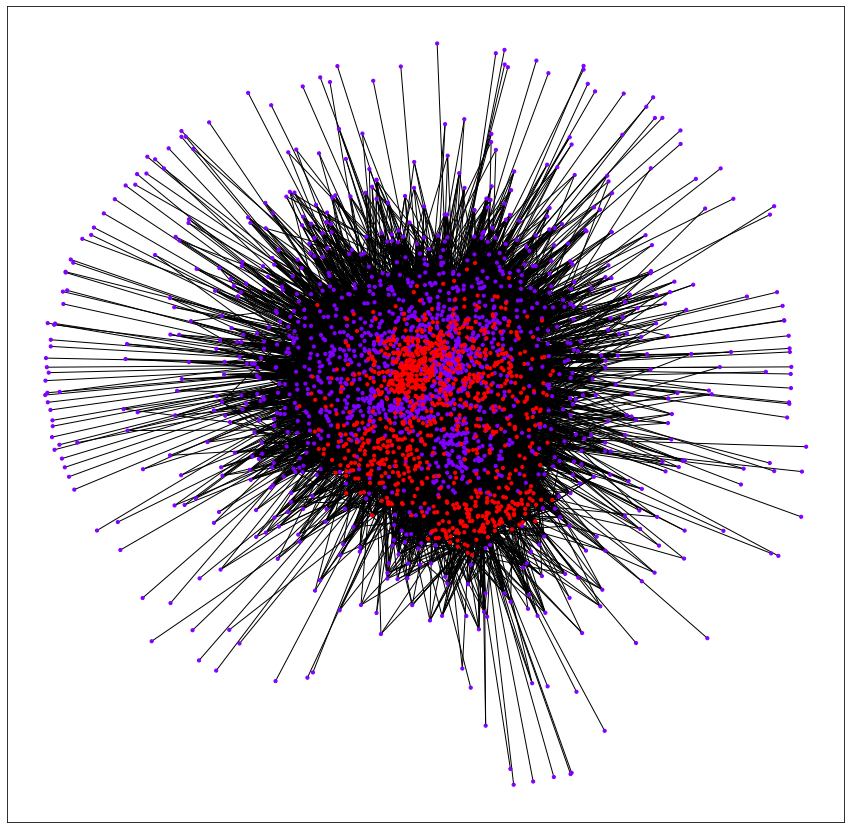

In [48]:
from pylab import *
pos=nx.spring_layout(g)
plt.figure(figsize=(15,15))
nx.draw_networkx(g, pos=pos, arrows=True,
                 with_labels=False, node_size=10,
                 cmap = cm.rainbow,
                 node_color=[ 0 if i in list_movies else 1 for i in g.nodes() ])

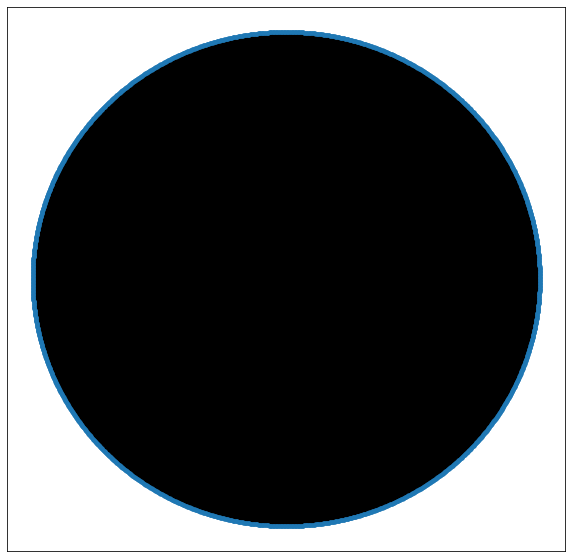

In [51]:
pos = nx.circular_layout(g)
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, node_size=10, with_labels=False)

In [ ]:
pos = nx.kamada_kawai_layout(g)
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, node_size=10, with_labels=False)

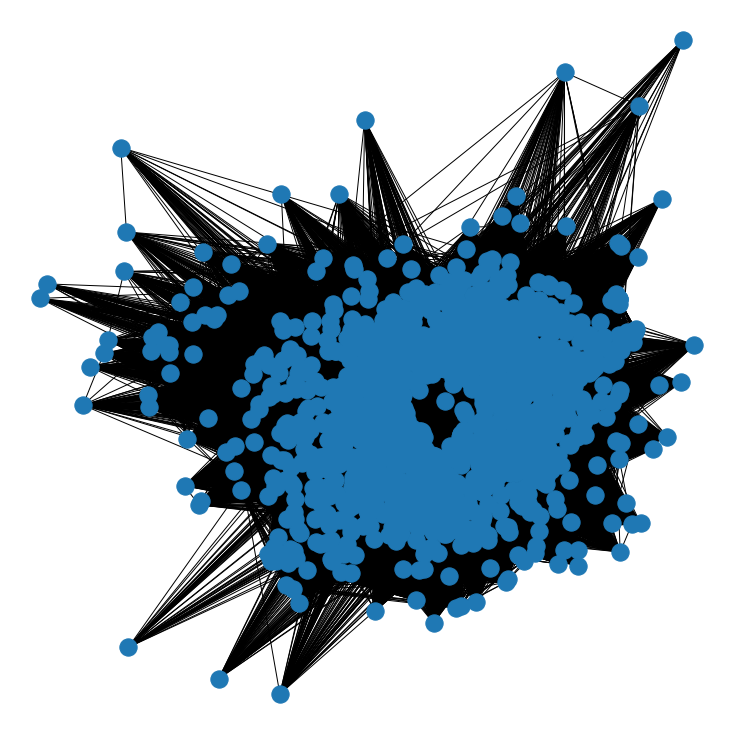

In [52]:
plt.figure(figsize=(10,10))
nx.draw(movie_projection_graph)

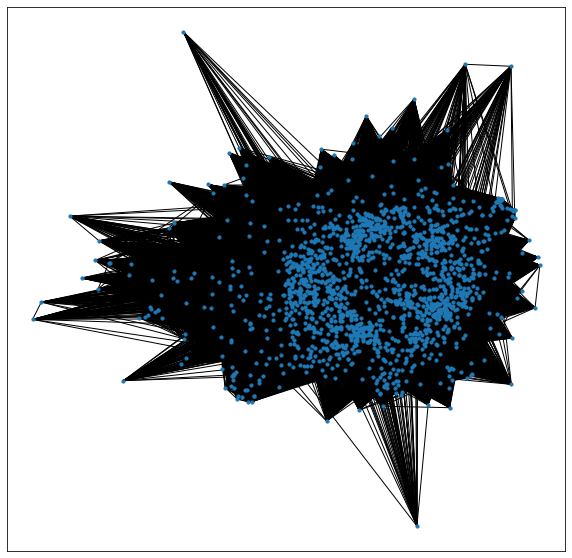

In [53]:
pos=nx.spring_layout(movie_projection_graph)
plt.figure(figsize=(10,10))
nx.draw_networkx(movie_projection_graph, pos=pos, arrows=True, with_labels=False, node_size=10)

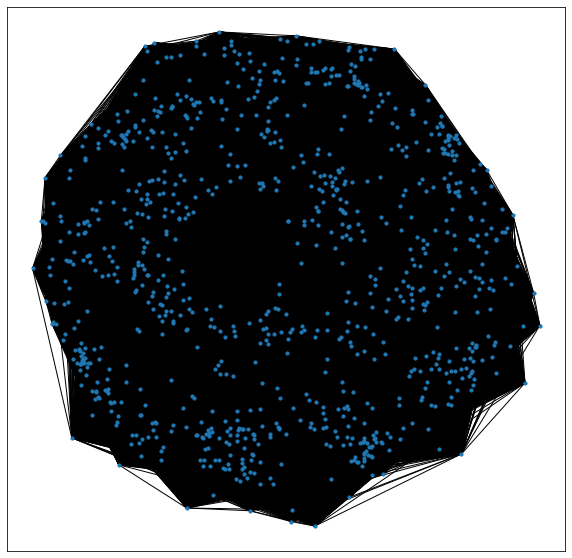

In [54]:
pos=nx.spring_layout(users_projection_graph)
plt.figure(figsize=(10,10))
nx.draw_networkx(users_projection_graph, pos=pos, arrows=True, with_labels=False, node_size=10)

In [78]:
from collections import Counter
def stats_dict(dicto, name='', prec=3):
    top10 = Counter(dicto).most_common(10)
    mean = pd.Series([*dicto.values()]).mean()
    std =np.std([ *dicto.values()])
    print('TOP 10:')
    for i,pair in enumerate(top10):
        print('{1}.({2}) {3:.{0}f}'.format(prec, i+1, pair[0], pair[1]) )
    print('MEAN:{1:.{0}f} STANDARD:{2:.{0}f}'.format(prec, mean, std))
    plt.title(name +' distribution')
    plt.ylabel('Frequency')
    plt.xlabel(name)
    plt.hist(list(dicto.values()), bins=50)
    plt.show()
    return mean, std
    
def stats_3(function, name, prec=3):
    part = ['Full dataset', 'Movie partition', 'Users partition']
    mean = [0]*3
    std = [0]*3
    print('FULL DATASET')
    mean[0], std[0] = stats_dict(function(g), 'Full Dataset '+name, prec=prec)
    print('\nMOVIE PARTITION')
    mean[1], std[1] = stats_dict(function(movie_projection_graph), 'Movie Partition '+name, prec=prec)
    print('\nUSERS PARTITION')
    mean[2], std[2] = stats_dict(function(users_projection_graph), 'Users Partition '+name, prec=prec)
    
    return pd.DataFrame({'Mean':mean, 'Standard deviation': std, 'Partition': part}).set_index('Partition')

## Degree Centrality
Number of links that a node has that allows to measure how important is a node with respect to its nearest neighbors. In other words the degree centrality for a node v is the fraction of nodes it is connected to.

FULL DATASET
TOP 10:
1.(405) 0.28243
2.(655) 0.26017
3.(13) 0.24252
4.(Star Wars (1977)) 0.22371
5.(450) 0.20645
6.(276) 0.19800
7.(Contact (1997)) 0.19532
8.(Fargo (1996)) 0.19493
9.(Return of the Jedi (1983)) 0.19455
10.(537) 0.18764
MEAN:0.02935 STANDARD:0.03495


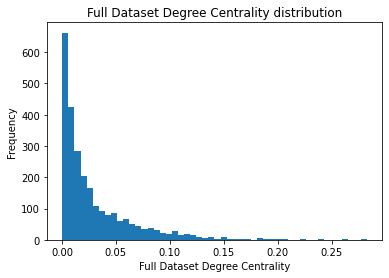


MOVIE PARTITION
TOP 10:
1.(Scream (1996)) 0.98918
2.(Star Wars (1977)) 0.97895
3.(Return of the Jedi (1983)) 0.97535
4.(L.A. Confidential (1997)) 0.97174
5.(Raiders of the Lost Ark (1981)) 0.96633
6.(Godfather, The (1972)) 0.96633
7.(Pulp Fiction (1994)) 0.96392
8.(Back to the Future (1985)) 0.96212
9.(Titanic (1997)) 0.96091
10.(Contact (1997)) 0.95911
MEAN:0.70066 STANDARD:0.21652


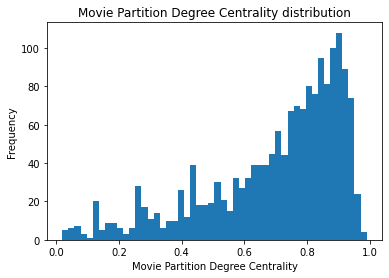


USERS PARTITION
TOP 10:
1.(1) 1.00000
2.(6) 1.00000
3.(7) 1.00000
4.(10) 1.00000
5.(11) 1.00000
6.(13) 1.00000
7.(16) 1.00000
8.(43) 1.00000
9.(49) 1.00000
10.(59) 1.00000
MEAN:0.96632 STANDARD:0.04890


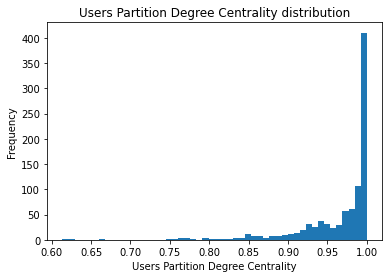

,Mean,Standard deviation
Partition,,
Full dataset,0.029348,0.034949
Movie partition,0.700657,0.216518
Users partition,0.966318,0.048904


In [79]:
stats_3(nx.degree_centrality, 'Degree Centrality', prec=5)

In the movies projection we can observe more degree centrality because nodes have much more conections.

In the user projection we can observe more degree centrality because nodes have much more conections.

## Clustering

It is the amount of triangles over the total amount of possible traingles that can be formed from node. 

FULL DATASET
TOP 10:
1.('Til There Was You (1997)) 0.00000
2.(1-900 (1994)) 0.00000
3.(101 Dalmatians (1996)) 0.00000
4.(12 Angry Men (1957)) 0.00000
5.(187 (1997)) 0.00000
6.(2 Days in the Valley (1996)) 0.00000
7.(20,000 Leagues Under the Sea (1954)) 0.00000
8.(2001: A Space Odyssey (1968)) 0.00000
9.(3 Ninjas: High Noon At Mega Mountain (1998)) 0.00000
10.(39 Steps, The (1935)) 0.00000
MEAN:0.00000 STANDARD:0.00000


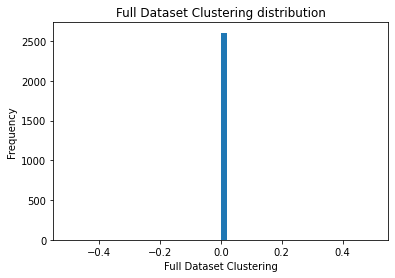


MOVIE PARTITION
TOP 10:
1.(I Don't Want to Talk About It (De eso no se habla) (1993)) 1.00000
2.(Terror in a Texas Town (1958)) 1.00000
3.(Hostile Intentions (1994)) 1.00000
4.(Butcher Boy, The (1998)) 1.00000
5.(Mirage (1995)) 1.00000
6.(Baton Rouge (1988)) 1.00000
7.(Aiqing wansui (1994)) 1.00000
8.(Vermont Is For Lovers (1992)) 1.00000
9.(Invitation, The (Zaproszenie) (1986)) 1.00000
10.(Great Day in Harlem, A (1994)) 1.00000
MEAN:0.86704 STANDARD:0.07155


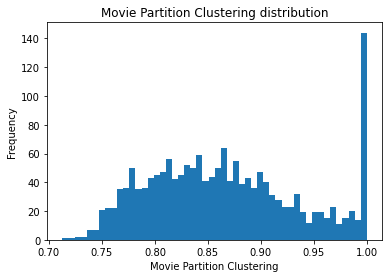


USERS PARTITION
TOP 10:
1.(289) 0.99502
2.(565) 0.99421
3.(172) 0.99403
4.(855) 0.99382
5.(93) 0.99324
6.(67) 0.99290
7.(471) 0.99272
8.(571) 0.99246
9.(51) 0.99236
10.(522) 0.99151
MEAN:0.97181 STANDARD:0.00644


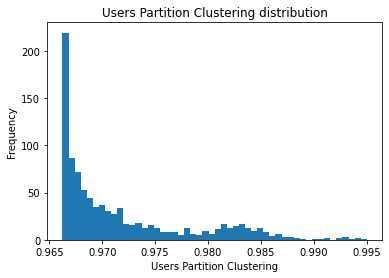

,Mean,Standard deviation
Partition,,
Full dataset,0.000000,0.000000
Movie partition,0.867045,0.071546
Users partition,0.971815,0.006442


In [80]:
stats_3(nx.clustering, 'Clustering', prec=5)

In this case, when clustering is applyed to the movie projection, the metric gives an idea if the related movies of a node are related together.

## Page Rank

Computes a ranking of the nodes in the graph G based on the structure of the incoming links. Related to the probability that a random walker arrives to a given node.

FULL DATASET
TOP 10:
1.(405) 0.00655
2.(655) 0.00506
3.(181) 0.00408
4.(13) 0.00354
5.(234) 0.00273
6.(279) 0.00268
7.(450) 0.00252
8.(Star Wars (1977)) 0.00250
9.(276) 0.00244
10.(782) 0.00243
MEAN:0.00038 STANDARD:0.00042


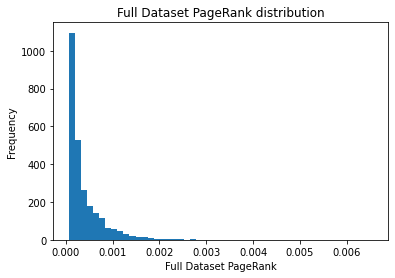


MOVIE PARTITION
TOP 10:
1.(Scream (1996)) 0.00084
2.(Star Wars (1977)) 0.00082
3.(L.A. Confidential (1997)) 0.00082
4.(Return of the Jedi (1983)) 0.00082
5.(Contact (1997)) 0.00082
6.(English Patient, The (1996)) 0.00081
7.(Titanic (1997)) 0.00081
8.(Liar Liar (1997)) 0.00081
9.(Godfather, The (1972)) 0.00081
10.(Raiders of the Lost Ark (1981)) 0.00081
MEAN:0.00060 STANDARD:0.00016


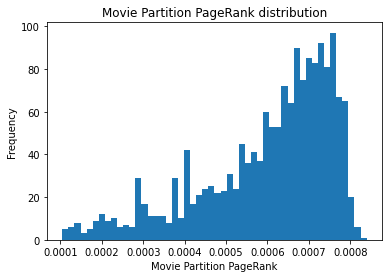


USERS PARTITION
TOP 10:
1.(144) 0.00109
2.(145) 0.00109
3.(174) 0.00109
4.(207) 0.00109
5.(214) 0.00109
6.(221) 0.00109
7.(222) 0.00109
8.(234) 0.00109
9.(236) 0.00109
10.(250) 0.00109
MEAN:0.00106 STANDARD:0.00005


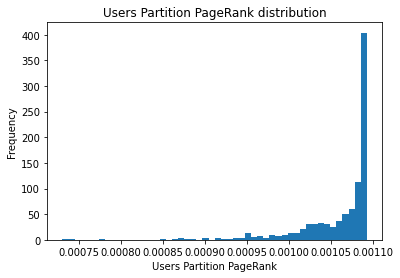

,Mean,Standard deviation
Partition,,
Full dataset,0.000384,0.000420
Movie partition,0.000601,0.000160
Users partition,0.001060,0.000046


In [81]:
stats_3(nx.pagerank, 'PageRank', prec=5)

## Betweenness centrality

Measures the intermediary node in the network. The centrality of the node is related to the amount of paths that the node is included. More the flow of a node has, more central.


FULL DATASET
TOP 10:
1.(405) 0.07310
2.(655) 0.05874
3.(181) 0.04088
4.(13) 0.03307
5.(234) 0.01942
6.(279) 0.01855
7.(782) 0.01745
8.(Scream (1996)) 0.01587
9.(Contact (1997)) 0.01480
10.(English Patient, The (1996)) 0.01473
MEAN:0.00064 STANDARD:0.00254


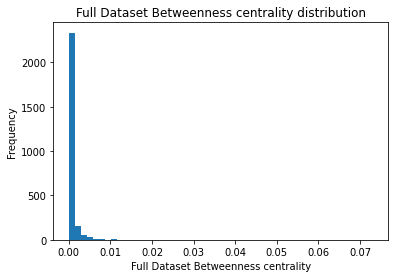


MOVIE PARTITION
TOP 10:
1.(Scream (1996)) 0.00104
2.(Contact (1997)) 0.00085
3.(English Patient, The (1996)) 0.00085
4.(L.A. Confidential (1997)) 0.00083
5.(Titanic (1997)) 0.00079
6.(Liar Liar (1997)) 0.00078
7.(Star Wars (1977)) 0.00075
8.(Chasing Amy (1997)) 0.00073
9.(Full Monty, The (1997)) 0.00073
10.(Air Force One (1997)) 0.00072
MEAN:0.00018 STANDARD:0.00016


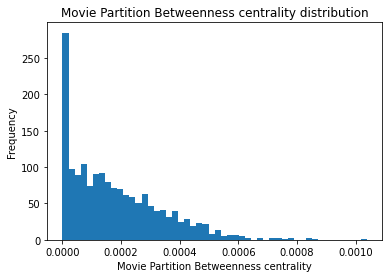


USERS PARTITION
TOP 10:
1.(1) 0.00005
2.(6) 0.00005
3.(7) 0.00005
4.(10) 0.00005
5.(11) 0.00005
6.(13) 0.00005
7.(16) 0.00005
8.(43) 0.00005
9.(49) 0.00005
10.(59) 0.00005
MEAN:0.00004 STANDARD:0.00001


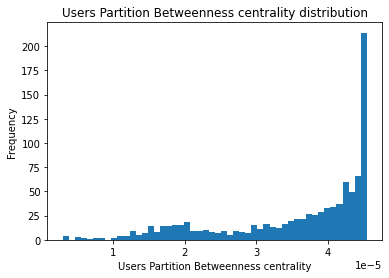

,Mean,Standard deviation
Partition,,
Full dataset,0.000636,0.002545
Movie partition,0.000180,0.000157
Users partition,0.000036,0.000011


In [83]:
stats_3(nx.betweenness_centrality, 'Betweenness centrality', prec=5)

## Edge Betweenness centrality

FULL DATASET
TOP 10:
1.(('Scream (1996)', 405)) 0.00129
2.(('Titanic (1997)', 405)) 0.00095
3.(('L.A. Confidential (1997)', 405)) 0.00082
4.(('Star Wars (1977)', 405)) 0.00081
5.(('Window to Paris (1994)', 279)) 0.00077
6.(('Farmer & Chase (1995)', 279)) 0.00077
7.(('Girl in the Cadillac (1995)', 279)) 0.00077
8.(('Modern Affair, A (1995)', 279)) 0.00077
9.(('Mostro, Il (1994)', 279)) 0.00077
10.(('August (1996)', 181)) 0.00077
MEAN:0.00003 STANDARD:0.00004


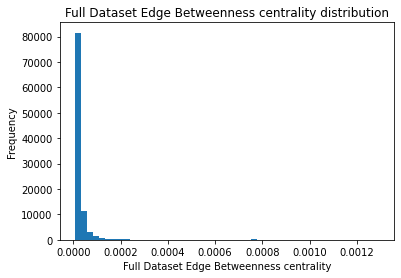


MOVIE PARTITION
TOP 10:
1.(("Schindler's List (1993)", 'Entertaining Angels: The Dorothy Day Story (1996)')) 0.00005
2.(('Entertaining Angels: The Dorothy Day Story (1996)', 'Contact (1997)')) 0.00004
3.(('Entertaining Angels: The Dorothy Day Story (1996)', 'English Patient, The (1996)')) 0.00004
4.(('Entertaining Angels: The Dorothy Day Story (1996)', "Ulee's Gold (1997)")) 0.00004
5.(('To Kill a Mockingbird (1962)', 'Entertaining Angels: The Dorothy Day Story (1996)')) 0.00004
6.(('Entertaining Angels: The Dorothy Day Story (1996)', 'Mars Attacks! (1996)')) 0.00004
7.(('My Left Foot (1989)', 'Entertaining Angels: The Dorothy Day Story (1996)')) 0.00004
8.(('Full Monty, The (1997)', 'Entertaining Angels: The Dorothy Day Story (1996)')) 0.00004
9.(('Entertaining Angels: The Dorothy Day Story (1996)', 'Remains of the Day, The (1993)')) 0.00004
10.(('Wag the Dog (1997)', 'Entertaining Angels: The Dorothy Day Story (1996)')) 0.00004
MEAN:0.00000 STANDARD:0.00000


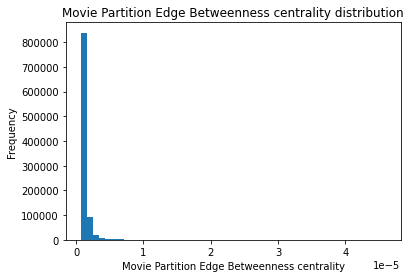


USERS PARTITION
TOP 10:
1.((565, 626)) 0.00000
2.((191, 565)) 0.00000
3.((565, 859)) 0.00000
4.((565, 574)) 0.00000
5.((565, 906)) 0.00000
6.((565, 736)) 0.00000
7.((38, 565)) 0.00000
8.((565, 860)) 0.00000
9.((2, 565)) 0.00000
10.((565, 697)) 0.00000
MEAN:0.00000 STANDARD:0.00000


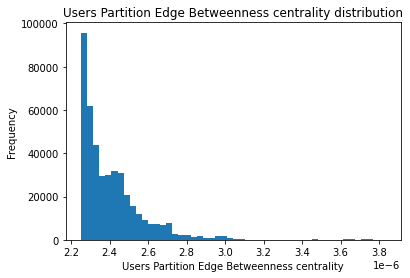

,Mean,Standard deviation
Partition,,
Full dataset,0.000027,4.405121e-05
Movie partition,0.000001,8.270614e-07
Users partition,0.000002,1.678380e-07


In [85]:
stats_3(nx.edge_betweenness_centrality, 'Edge Betweenness centrality', prec=5)

## Closeness centrality

Average distance for each node to the others.


FULL DATASET
TOP 10:
1.(Star Wars (1977)) 0.51512
2.(Return of the Jedi (1983)) 0.49895
3.(Scream (1996)) 0.49780
4.(Contact (1997)) 0.49422
5.(Fargo (1996)) 0.49291
6.(English Patient, The (1996)) 0.48866
7.(Liar Liar (1997)) 0.48866
8.(Toy Story (1995)) 0.48072
9.(Raiders of the Lost Ark (1981)) 0.48019
10.(405) 0.47993
MEAN:0.37996 STANDARD:0.03546


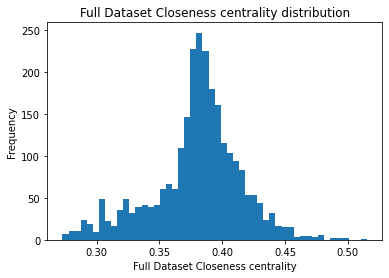


MOVIE PARTITION
TOP 10:
1.(Scream (1996)) 0.98929
2.(Star Wars (1977)) 0.97939
3.(Return of the Jedi (1983)) 0.97594
4.(L.A. Confidential (1997)) 0.97251
5.(Raiders of the Lost Ark (1981)) 0.96742
6.(Godfather, The (1972)) 0.96742
7.(Pulp Fiction (1994)) 0.96518
8.(Back to the Future (1985)) 0.96350
9.(Titanic (1997)) 0.96238
10.(Contact (1997)) 0.96072
MEAN:0.78861 STANDARD:0.11551


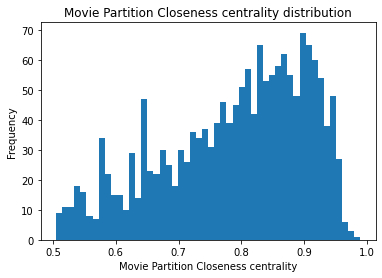


USERS PARTITION
TOP 10:
1.(1) 1.00000
2.(6) 1.00000
3.(7) 1.00000
4.(10) 1.00000
5.(11) 1.00000
6.(13) 1.00000
7.(16) 1.00000
8.(43) 1.00000
9.(49) 1.00000
10.(59) 1.00000
MEAN:0.96937 STANDARD:0.04140


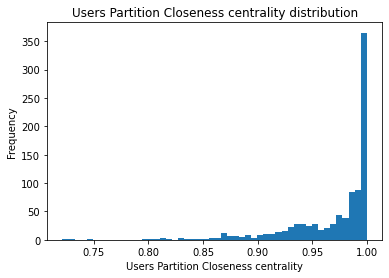

,Mean,Standard deviation
Partition,,
Full dataset,0.379961,0.035456
Movie partition,0.788606,0.115509
Users partition,0.969367,0.041404


In [86]:
stats_3(nx.closeness_centrality, 'Closeness centrality', prec=5)

# Macrosacale metrics

In this section we compute some macroscale metrics of the user/movie graph projection

### Distance measures
Summarize path's length between nodes. Eccentricity is the maximum distance from a node to all other nodes in G.
For example, follwing we compute the exentricity of a well known movie like Citizen Kane is 2. That means that we can find a user in comon that has seen Citizen Kane and any other movie

In [89]:
nx.eccentricity(movie_projection_graph)

{'Blue Sky (1994)': 2,
 'Little City (1998)': 2,
 'Crumb (1994)': 2,
 'Addams Family Values (1993)': 2,
 'Grease 2 (1982)': 2,
 'Whole Wide World, The (1996)': 2,
 'D3: The Mighty Ducks (1996)': 2,
 'Twister (1996)': 2,
 'Kalifornia (1993)': 2,
 "Pete's Dragon (1977)": 2,
 "I Don't Want to Talk About It (De eso no se habla) (1993)": 2,
 'Kama Sutra: A Tale of Love (1996)': 2,
 'Backbeat (1993)': 2,
 'Amityville 3-D (1983)': 2,
 'Heavyweights (1994)': 2,
 'Feast of July (1995)': 2,
 'Courage Under Fire (1996)': 2,
 'Drop Zone (1994)': 2,
 'Flower of My Secret, The (Flor de mi secreto, La) (1995)': 2,
 'Terror in a Texas Town (1958)': 2,
 'Somewhere in Time (1980)': 2,
 'Tombstone (1993)': 2,
 'Faster Pussycat! Kill! Kill! (1965)': 2,
 'Hostile Intentions (1994)': 2,
 'Sound of Music, The (1965)': 2,
 'Judgment Night (1993)': 2,
 'Striking Distance (1993)': 2,
 'Kicking and Screaming (1995)': 2,
 'Die Hard 2 (1990)': 2,
 'Priest (1994)': 2,
 'Madame Butterfly (1995)': 2,
 "Preacher's Wif

Diameter computes the maximum eccentricity of the graph. This number is the maximum distance between any two nodes of the graph, hence the computation is extremely heavy.

In [36]:
nx.diameter(movie_projection_graph)

2

Center retrives the movies that have the excentricy equal to the radius. Those movies are the ones that have at least one user in comon to any other movie. 

In [37]:
nx.center(movie_projection_graph)[:10]

['Locusts, The (1997)',
 'Hollow Reed (1996)',
 "Wooden Man's Bride, The (Wu Kui) (1994)",
 'Midnight in the Garden of Good and Evil (1997)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Smile Like Yours, A (1997)',
 'War at Home, The (1996)',
 'Akira (1988)',
 'Cabin Boy (1994)',
 'B*A*P*S (1997)']

Same happens if we anlyse the user projection. If we compute the excentricity of user 10, we see that he has at least one movie in common to any other movie.

In [38]:
nx.eccentricity(users_projection_graph,10)

1

In [39]:
nx.eccentricity(users_projection_graph,88)

2

In [40]:
nx.diameter(users_projection_graph)

2

### Clustering
Number of triangles over the posible tirange (triads, the number of two edges that a node is part). It gisves an idea of circle of movies that have users in common (alternatively for users). Following the average of clustering for each graph.

In [41]:
nx.average_clustering(movie_projection_graph)

0.8670446853322662

In [42]:
nx.average_clustering(users_projection_graph)

0.9718148456405401

### Degree distribution
Following we compute the histogram of number of links per node. Indocator of the probability that a randomly selected node has k links (P(k)). 
Following the histogram of links per node of the movie projection graph. Despite there is an uniform distirbution of links, most of the density is situated between 1000 and 1600 links. Movies that are more popular have more links.

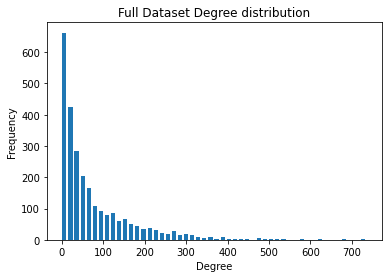

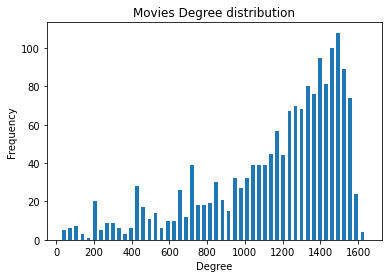

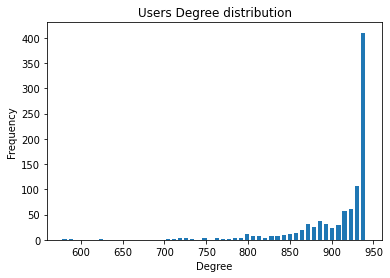

In [26]:
def plot_degree(graph, name='', bins=100, width=1):
    
    plt.show()
    plt.title(name +' Degree distribution')
    plt.ylabel('Frequency')
    plt.xlabel('Degree')
    plt.hist([d for n,d in graph.degree()], bins=bins, width=width)
    plt.show()
    return

def degree_3():
    plot_degree(g, name='Full Dataset', bins=50, width= 10)
    plot_degree(movie_projection_graph, name='Movies', bins=50, width=20)
    plot_degree(users_projection_graph, name='Users', bins=50, width= 5)
    
def cdf(sth):
    for i in range(1,len(sth)):
        sth[i] += sth[i-1]
    return sth


degree_3()

## Assortativity

 Assortativity tells us if nodes connected to each other are similar. We have calculated the assortativity coefficient for the whole graph and its 2 projections. We expected a negative assortativity coefficient (disassortative network) for the whole graph since it is bipartite and each node is only connected to nodes belonging to the other graph. The projection of the network corresponding to users has a close to 0 assortativity coefficient and pearson coefficient which may indicate randomness. And lastly, the projection of the network corresponding to movies shows quite a low pearson and assortativity coefficients but not as low as the beforementioned graph.

In [45]:
assor_coeff_users = nx.degree_assortativity_coefficient(users_projection_graph)
pearson_coeff_users = nx.degree_pearson_correlation_coefficient(users_projection_graph)
print('User projection')
print('Assortativity coefficient:', assor_coeff_users,'Pearson coefficient:', pearson_coeff_users)

User projection
Assortativity coefficient: -0.055225636567298834 Pearson coefficient: -0.05522563656725163


In [46]:
assor_coeff_movie = nx.degree_assortativity_coefficient(movie_projection_graph)
pearson_coeff_movie = nx.degree_pearson_correlation_coefficient(movie_projection_graph)
print('Movies projection')
print('Assortativity coefficient:', assor_coeff_movie,'Pearson coefficient:', pearson_coeff_movie)

Movies projection
Assortativity coefficient: -0.1383336019620416 Pearson coefficient: -0.1383336019619873


In [47]:
assor_coeff = nx.degree_assortativity_coefficient(g)
pearson_coeff = nx.degree_pearson_correlation_coefficient(g)
print('Full graph')
print('Assortativity coefficient:', assor_coeff,'Pearson coefficient:', pearson_coeff)

Full graph
Assortativity coefficient: -0.227009766405234 Pearson coefficient: -0.22700976640523904


In [48]:

# function that plots the degree distribution of the network
def plot_deg_hist(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.bar(deg, cnt, width=1, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)

    plt.show()
def print_degree_mean(graph):
    degree_mean = np.array([d for n, d in graph.degree()]).mean()
    print("Degree mean {}".format(degree_mean))
    
def print_assor(graph):
    assor_coeff = nx.degree_assortativity_coefficient(graph)
    pearson_coeff = nx.degree_pearson_correlation_coefficient(graph)
    print('Assortativity coefficient:', assor_coeff,'\nPearson coefficient:', pearson_coeff)
    
def print_clust(graph):
    string = 'The average clustering is {}'
    print(string.format(nx.average_clustering(graph)))
    
def print_diameter(graph):
    string = 'The diameter is {}'
    print(string.format(nx.diameter(graph)))

## Random graphs

Let us review briefly some of the features and magnitudes that describe our network (or pair of networks) from the DataLens dataset.

In [49]:
n_nodes_movies = len(movie_projection_graph.nodes())
n_edges_movies = len(movie_projection_graph.edges())


n_nodes_users = len(users_projection_graph.nodes())
n_edges_users = len(users_projection_graph.edges())

n_nodes = len(g.nodes())
n_edges = len(g.edges())

print('Some figures about the bipartite dataset:')
figures_string = 'The {} projection has {} nodes and {} edges.'
print(figures_string.format('movie', n_nodes_movies, n_edges_movies))
print(figures_string.format('user' ,n_nodes_users, n_edges_users))
print(figures_string.format('full' ,n_nodes, n_edges))



Some figures about the bipartite dataset:
The movie projection has 1664 nodes and 969440 edges.
The user projection has 943 nodes and 429193 edges.
The full projection has 2607 nodes and 99693 edges.


Clearly the full graph constit on the sum of projections nodes but contains less edges as it only representsrelation user movies.


Full graph degree distribution
Assortativity coefficient: -0.227009766405234 
Pearson coefficient: -0.22700976640523904


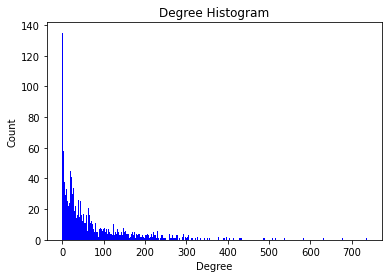

The average clustering is 0.0


In [50]:
print('\nFull graph degree distribution')
print_assor(g)
plot_deg_hist(g)
print_clust(g)


Movie projection degree distribution
Assortativity coefficient: -0.1383336019620416 
Pearson coefficient: -0.1383336019619873


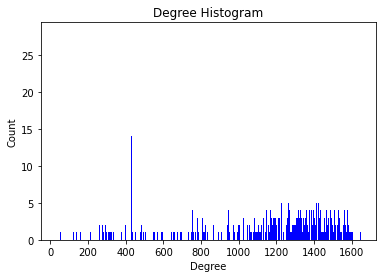

The average clustering is 0.8670446853322662


In [51]:
print('\nMovie projection degree distribution')
print_assor(movie_projection_graph)
plot_deg_hist(movie_projection_graph)
print_clust(movie_projection_graph)

In [52]:
print_degree_mean(movie_projection_graph)

Degree mean 1165.1923076923076



Users projection degree distribution
Assortativity coefficient: -0.055225636567298834 
Pearson coefficient: -0.05522563656725163


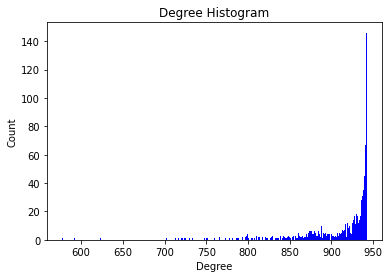

The average clustering is 0.9718148456405401


In [53]:
print('\nUsers projection degree distribution')
print_assor(users_projection_graph)
plot_deg_hist(users_projection_graph)
print_clust(users_projection_graph)

In [54]:
print_degree_mean(users_projection_graph)

Degree mean 910.271474019088


#### Erdos-Renyi Graph
The NetworkX implementations offers a function for Erdos-Renyi that accept as parameters the number of nodes and the edge probability. This deffinition is more similar to the Binomial Random Graph. We test with two random graphs taht contains the number of nodes of each projection. We observe that the degree distribution has a a normal shape, different from the histogram of the projections. Also we notice that all random grphs have assortativity and Pearson near 0. One intersting thing is that the random graph with 0.9 of edge probability have a similar clustering factor despite not having similar assortativity.

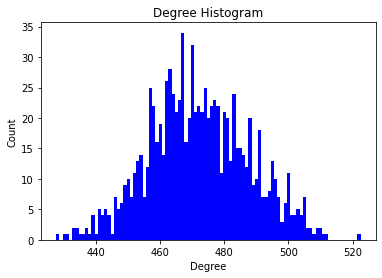

Assortativity coefficient: -0.0052930554661996376 
Pearson coefficient: -0.005293055466140788
The average clustering is 0.5011942614508915


In [55]:
er_graph = nx.erdos_renyi_graph(n_nodes_users, 0.5)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

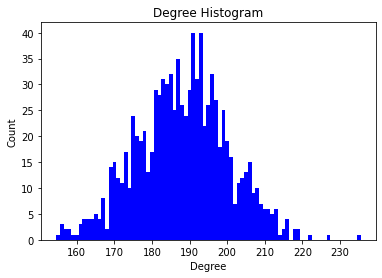

Assortativity coefficient: -0.00133165328868538 
Pearson coefficient: -0.001331653288699732
The average clustering is 0.1997402155271874


In [56]:
er_graph = nx.erdos_renyi_graph(n_nodes_users, 0.2)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

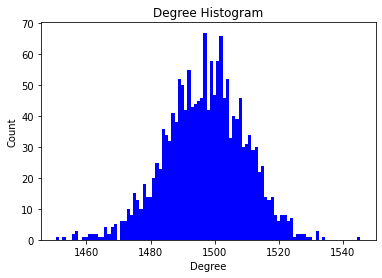

Assortativity coefficient: -0.0016478707595084896 
Pearson coefficient: -0.0016478707581397845
The average clustering is 0.9002350330227297


In [57]:
er_graph = nx.erdos_renyi_graph(n_nodes_movies, 0.9)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

Edge probability  0.5476188653437857


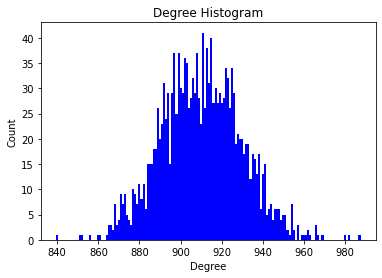

Assortativity coefficient: -0.0019892157714939142 
Pearson coefficient: -0.0019892157716937813
The average clustering is 0.5473206393629886


In [58]:
p = n_edges_users/(n_nodes_movies*(n_nodes_users-1)/2)
print("Edge probability ", p)
er_graph = nx.erdos_renyi_graph(n_nodes_movies, p)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

We also try with probability equal to the proportion of edges with respect to the total posible edges, but we still observe the results far from being similar to the original networks.

Edge probability  0.700656829640594


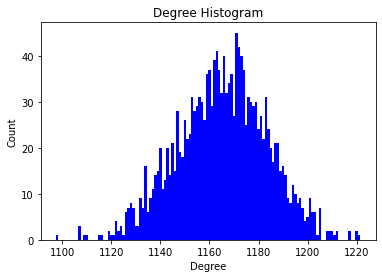

Assortativity coefficient: -0.0012701426851462578 
Pearson coefficient: -0.0012701426859516064
The average clustering is 0.7007043703120058


In [59]:
p = n_edges_movies/(n_nodes_movies*(n_nodes_movies-1)/2)
print("Edge probability ", p)
er_graph = nx.erdos_renyi_graph(n_nodes_movies, p)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

#### Watts-Strogatz graph
Following we compute several small world grpahs with the users nodes and movie words. The function uses as parameters the numbe rof ndes, the k nearest neghibours of the ring topology and the probability of rewiring. Paritcularly we use th user mean as k nearest neighbour and we vary the probability of rewiring. The histogram of the random graphs again is not similar to any of the projections, it has a bell shape. The cluster index , however, is the same we are using the average k nearest degree from the projection.

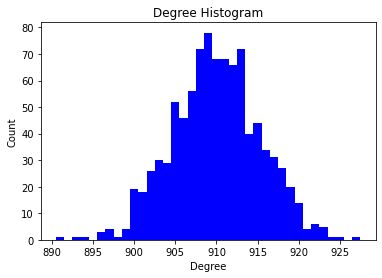

Assortativity coefficient: -0.0022299082711848997 
Pearson coefficient: -0.002229908262817641
The average clustering is 0.9660515582838453
Degree mean 910.0


In [60]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.2)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

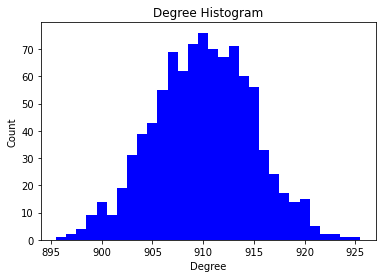

Assortativity coefficient: -0.0021002030443270274 
Pearson coefficient: -0.002100203054725172
The average clustering is 0.9660544129647395
Degree mean 910.0


In [61]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.5)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

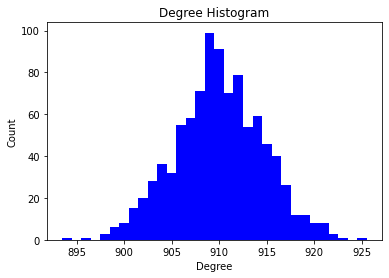

Assortativity coefficient: -0.0020749537410461832 
Pearson coefficient: -0.0020749537426144778
The average clustering is 0.9660485450825742
Degree mean 910.0


In [62]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.7)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

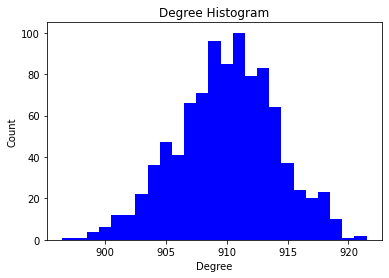

Assortativity coefficient: -0.001896106762650669 
Pearson coefficient: -0.0018961067625050576
The average clustering is 0.966037333156925
Degree mean 910.0


In [63]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.9)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

#### Barabasi Albert graph
The networkX function uses the nodes and an extra parameter that is the number of edges to attach from a new node to existing nodes. We test on many Barbasi random grphs 

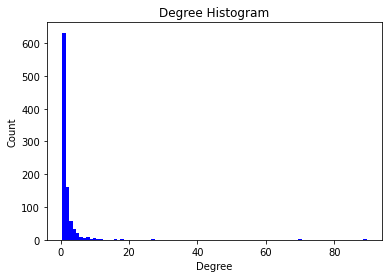

Assortativity coefficient: -0.11608602660595843 
Pearson coefficient: -0.11608602660595849
The average clustering is 0.0
Degree mean 1.997879109225875


In [64]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 1)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

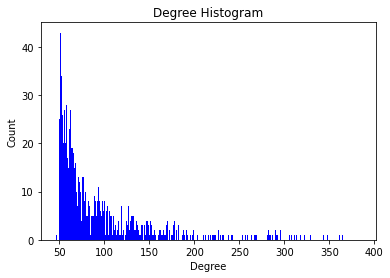

Assortativity coefficient: -0.005620336988543838 
Pearson coefficient: -0.005620336988547852
The average clustering is 0.18143949115600308
Degree mean 94.69777306468717


In [65]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 50)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

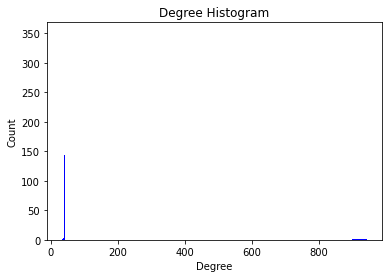

Assortativity coefficient: -0.9540424386776798 
Pearson coefficient: -0.9540424386776762
The average clustering is 0.9583755007988574
Degree mean 82.07847295864264


In [66]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 900)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

### Fitting a distribution 

We try to fit a distribution, ideally a powerlaw to the degree distribution of the full dataset. Since we realise it looks like the Barabasi-Albert degree distribution which makes it a scale-free network. A powerlaw is:

$x$ is the degree and $c$ is the count corresponding to that degree.


We will fit a power law with equation:

$$c(x) = \alpha x^{-\gamma}$$

To do so we will first we will do a log-log representation:

$$\log(c(x)) = -\gamma \log(x) + \log(\alpha) = m \log(x) + b$$

with $m$ being the slope of the linear regression and $b$ the the $y$-intercept.

if we want to translate this into a probability density function we just need normalize this distribution by multiplying it by a determined constant. We have to take into account that the minimum value for $x$, that is the degree, is 1 and so the domain $D(x) = (1,\infty)$. We proceed to do the integral:

$$ 1 =  \int_{1}^{\infty} c(x) dx =  \int_{1}^{\infty} \alpha x^{-\gamma} dx = \dfrac {\alpha}{1 - \gamma} $$


So to normalize $\alpha$ should be such that:

$$\alpha = 1 - \gamma$$

We just too look for $\gamma$ consequently and from it we will obtain $\alpha$. Therefore the power law fit will look like this:

$$( 1 - \gamma) x^{-\gamma} $$

We can now calculate the cumulative density function, $F$, as:

$$F(x) = P (X \leq x) = \int_{1}^{x} p(x)dx = 1 - x^{1 - \gamma}$$

The complementary of the cdf will be:

$$G(x)= P (X \geq x) = 1 - F(x) = x^{1 - \gamma}$$

In order to fit a powerlaw we just the previous result and we obtain that in this case:

$$ F_2(x) = (2 - \gamma) x^{1 - \gamma} $$

>>> raw
NBINS: 10


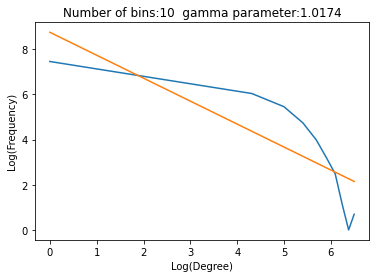

NBINS: 100


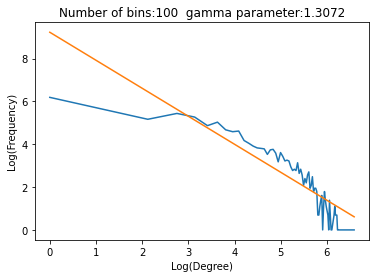

NBINS: 1000


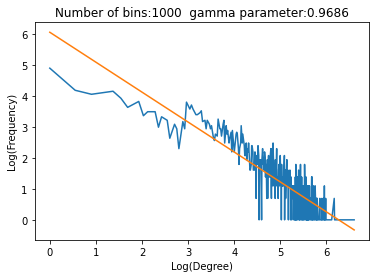

>>> cumulative
736


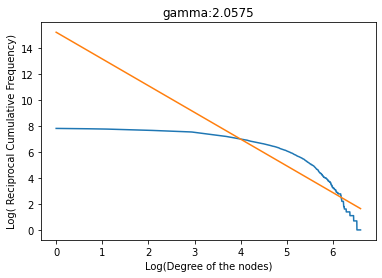

>>> bins


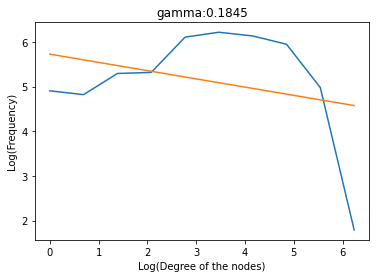

0.18446739787173658

In [147]:
from sklearn.linear_model import LinearRegression

#CUMULATIVE
def power_law(graph, type_fit='raw', log_x=False, log_y=False, k=False):
    print('>>>',type_fit)
    if type_fit=='raw':
        nbins_list = [10,100,1000]
        for nbins in nbins_list:
            print('NBINS:',nbins)
            fig = plt.figure()
            a,b,c = plt.hist([d for n,d in graph.degree()], bins=nbins)
            plt.close(fig)

            x = b[:-1]
            mask = (a>0) & (x>0)
        #     x = np.log(x[mask])
            x = x[mask].reshape(-1,1)
            y = a[mask]
            if log_x:
                x = np.log(x)
            if log_y:
                y = np.log(y)
                
            reg = LinearRegression().fit(x, y)
            ypred = reg.predict(x)
            gamma = -reg.coef_[0]
            
            plt.xlabel('Degree')
            if log_x:
                plt.xlabel('Log(Degree)')
            plt.ylabel('Frequency')
            if log_y:
                plt.ylabel('Log(Frequency)')
            plt.title('Number of bins:{}  gamma parameter:{:.4f}'.format(nbins, gamma))

            plt.plot(x,y)
            plt.plot(x,ypred)
            plt.show() 


    if type_fit=='cumulative':
        fig = plt.figure()
        seq = [d for n,d in graph.degree()]
        bins = [i for i in range(max(seq)+1)]
        print(max(seq))
        a,b,c = plt.hist(seq,bins=bins)
        plt.close(fig)
        cumulative = cdf(a)

        x = b[:-1]
        y = max(cumulative)-cumulative
        mask = (y>0) & (x>0)
        x = x[mask].reshape(-1,1)
        y = y[mask]
        if log_x:
            x = np.log(x)
        if log_y:
            y = np.log(y)

        reg = LinearRegression()
        reg.fit(x,y)
        ypred = reg.predict(x)
        gamma =  -reg.coef_[0] 
        
        plt.title('gamma:{:.4f}'.format(gamma))
        plt.xlabel('Degree of the nodes')
        if log_x:
            plt.xlabel('Log(Degree of the nodes)')
        plt.ylabel('Reciprocal Cumulative Frequency')
        if log_y:
            plt.ylabel('Log( Reciprocal Cumulative Frequency)')
        plt.plot(x,y)
        plt.plot(x,ypred)
        plt.show()
    
    if type_fit=='bins':
    
        bins = [2**i for i in range(11)]
        fig = plt.figure()
        plt.title(' Degree distribution')
        plt.ylabel('Frequency')
        plt.xlabel('Degree')
        a,b,c = plt.hist([d for n,d in graph.degree()], bins=bins)
        plt.close(fig)
        

        mask = (a>0) & (b[:-1]>0)
        x = b[:-1]
        y = a[mask]
        x = x[mask].reshape(-1,1)
        if log_x:
            x = np.log(x)
        if log_y:
            y = np.log(y)
       

        reg = LinearRegression()
        if k:
            mask = x>100
            x = x[mask].reshape(-1,1)
            y = y[mask.reshape(-1)]
        reg.fit(x,y)
        ypred = reg.predict(x)
        gamma = - reg.coef_[0]
        
        plt.title('gamma:{:.4f}'.format(gamma))
        plt.xlabel('Degree of the nodes')
        if log_x:
                plt.xlabel('Log(Degree of the nodes)')
        plt.ylabel('Frequency') 
        if log_y:
            plt.ylabel('Log(Frequency)')
        
        plt.plot(x,y)
        plt.plot(x,ypred)
        plt.show()
        
    return gamma


power_law(g, 'raw', log_x=True, log_y=True)
power_law(g, 'cumulative', log_x=True, log_y=True)
power_law(g, 'bins', log_x=True, log_y=True)

We quickly realise a powerlaw its's a ideal and maybe it is a exponential distribution.

$$c(x) = \alpha e^{-\gamma x}$$

in this case the cumulative is:

$$C(x)  \propto e^{-\gamma x} $$

>>> raw
NBINS: 10


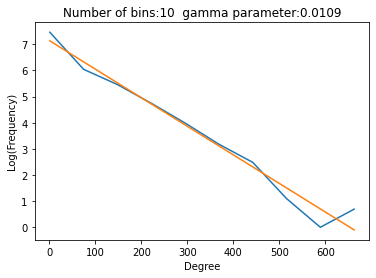

NBINS: 100


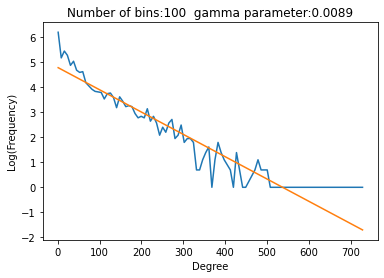

NBINS: 1000


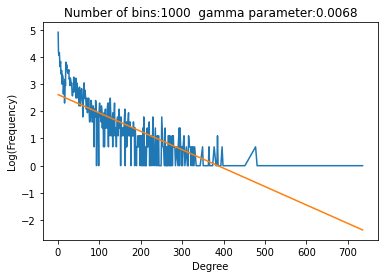

>>> cumulative
736


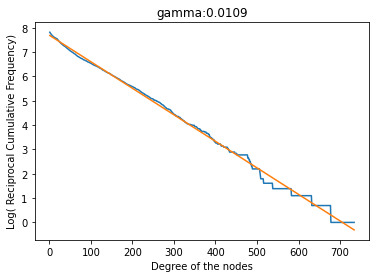

>>> bins


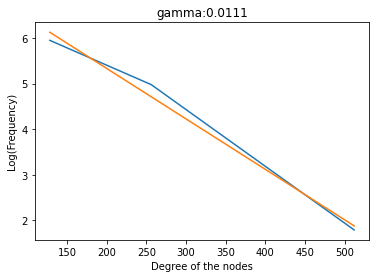

0.0110547301077025

In [148]:
power_law(g, 'raw', log_y=True)
power_law(g, 'cumulative', log_y=True)
power_law(g, 'bins', log_y=True, k=True)

# Communities
Following we use the module community (https://github.com/taynaud/python-louvain) that performs the louvain method. First we will apply the community partiton algorithm to the user projection graph.

In [11]:
import networkx
import community

In [12]:
%%time
partition = community.best_partition(users_projection_graph)

CPU times: user 8.03 s, sys: 263 ms, total: 8.3 s
Wall time: 9.08 s


In [13]:
print("Best parition founded by Louvian methdod is dividing the users into {} communities".format(len(set(partition.values()))))

Best parition founded by Louvian methdod is dividing the users into 2 communities


NetworkX has a set of funtion that measures the perfomance of partitions (https://networkx.github.io/documentation/stable/reference/algorithms/community.html).
Performance is the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.

In [14]:
partition_dict = { p:[] for p in set(partition.values())}
for node, p in partition.items():
    partition_dict[p].append(node)
partition_list = [l for l in partition_dict.values()]

In [15]:
print("Louvian method performance", networkx.algorithms.community.performance(users_projection_graph, partition_list))

Louvian method performance 0.526122754996589


Following we alter the Louvian partition in order to corrroborate how the performance is affected

In [16]:
partition_list_mod = []
for c in partition_list:
    s = int(len(c)/2)
    partition_list_mod.append(c[:s])
    partition_list_mod.append(c[s:])
print("Performance of altered partition", networkx.algorithms.community.performance(users_projection_graph, partition_list_mod))

Performance of altered partition 0.2792866422156329


As we expected by analyzing the clustering method and eccentricity, the useres proection graph is highly dense, so the algorithm found that splitting the useres into two communities is the best partition so far

Now we will perform the same anlysis using the movie proection.

In [17]:
%%time
partition = community.best_partition(movie_projection_graph)

CPU times: user 22.8 s, sys: 329 ms, total: 23.1 s
Wall time: 25.6 s


In [18]:
print("Best parition founded by Louvian methdod is dividing the users into {} communities".format(len(set(partition.values()))))

Best parition founded by Louvian methdod is dividing the users into 3 communities


In [19]:
partition_dict = { p:[] for p in set(partition.values())}
for node, p in partition.items():
    partition_dict[p].append(node)
partition_list = [l for l in partition_dict.values()]
print("Louvian method performance", networkx.algorithms.community.performance(movie_projection_graph, partition_list))

Louvian method performance 0.5324858920394098


In [20]:
partition_list_mod = []
for c in partition_list:
    s = int(len(c)/2)
    partition_list_mod.append(c[:s])
    partition_list_mod.append(c[s:])
print("Performance of altered partition", networkx.algorithms.community.performance(movie_projection_graph, partition_list_mod))

Performance of altered partition 0.41575697303298026


In [21]:
partition_list[0][:10]

['Prefontaine (1997)',
 'Fantasia (1940)',
 'Love and a .45 (1994)',
 'Getaway, The (1994)',
 'Lawrence of Arabia (1962)',
 'Dial M for Murder (1954)',
 'Howling, The (1981)',
 'Santa with Muscles (1996)',
 'Clockwork Orange, A (1971)',
 'Three Colors: Blue (1993)']

In [22]:
partition_list[1][:10]

['Killing Fields, The (1984)',
 'Third Man, The (1949)',
 'Unstrung Heroes (1995)',
 'Amityville Curse, The (1990)',
 'Red Firecracker, Green Firecracker (1994)',
 'Suture (1993)',
 'Trial by Jury (1994)',
 'Local Hero (1983)',
 'Scarlet Letter, The (1995)',
 'Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)']

In [23]:
partition_list[2][:10]

['Truth About Cats & Dogs, The (1996)',
 'Replacement Killers, The (1998)',
 'Bottle Rocket (1996)',
 'Lay of the Land, The (1997)',
 "Roseanna's Grave (For Roseanna) (1997)",
 'Fly Away Home (1996)',
 'Nutty Professor, The (1996)',
 '187 (1997)',
 'Up Close and Personal (1996)',
 'Mina Tannenbaum (1994)']

In this case we see the Louvian method takes longer to compute the best paritition. In this case the algorithm splitted the graph into three commuinities and obtained a performance similar to the users_proection.

In [24]:
d = nx.pagerank(movie_projection_graph)
sorted(d.items(), key=lambda x: x[1])[:10]

[('Entertaining Angels: The Dorothy Day Story (1996)', 0.00010450649050642066),
 ('King of New York (1990)', 0.00011249104276329198),
 ('Further Gesture, A (1996)', 0.00011494281866085136),
 ('Big Bang Theory, The (1994)', 0.00011726653258802094),
 ('Other Voices, Other Rooms (1997)', 0.00011726653258802097),
 ('Very Natural Thing, A (1974)', 0.00012076330883072383),
 ('Walk in the Sun, A (1945)', 0.00012076330883072386),
 ('Cyclo (1995)', 0.00012502702595725587),
 ('Coldblooded (1995)', 0.00013081853627991205),
 ('Hush (1998)', 0.00013154636868450555)]

In [25]:
#Partition 0
sorted([(m,d[m]) for m in partition_list[0]], key=lambda x: x[1])[:10]

[('King of New York (1990)', 0.00011249104276329198),
 ('Very Natural Thing, A (1974)', 0.00012076330883072383),
 ('Walk in the Sun, A (1945)', 0.00012076330883072386),
 ('Cyclo (1995)', 0.00012502702595725587),
 ('Coldblooded (1995)', 0.00013081853627991205),
 ('Mirage (1995)', 0.00013340319457947673),
 ("I Don't Want to Talk About It (De eso no se habla) (1993)",
  0.00014419671379699363),
 ('Reluctant Debutante, The (1958)', 0.00014453135509342248),
 ('Visitors, The (Visiteurs, Les) (1993)', 0.0001502375581140847),
 ('New Age, The (1994)', 0.00016119858216369365)]

In [26]:
#Partition 1
sorted([(m,d[m]) for m in partition_list[1]], key=lambda x: x[1])[:10]

[('Yankee Zulu (1994)', 0.00040706243169419745),
 ('T-Men (1947)', 0.00040706243169419745),
 ('Tigrero: A Film That Was Never Made (1994)', 0.00040706243169419745),
 ('Death in the Garden (Mort en ce jardin, La) (1956)',
  0.00040706243169419745),
 ('Vie est belle, La (Life is Rosey) (1987)', 0.00040706243169419745),
 ("Wend Kuuni (God's Gift) (1982)", 0.00040706243169419745),
 ('Invitation, The (Zaproszenie) (1986)', 0.00040706243169419745),
 ('Hungarian Fairy Tale, A (1987)', 0.0004070624316941975),
 ('Terror in a Texas Town (1958)', 0.0004070624316941975),
 ('Lashou shentan (1992)', 0.0004070624316941975)]

In [27]:
#Partition 2
sorted([(m,d[m]) for m in partition_list[2]], key=lambda x: x[1])[:10]

[('Entertaining Angels: The Dorothy Day Story (1996)', 0.00010450649050642066),
 ('Further Gesture, A (1996)', 0.00011494281866085136),
 ('Big Bang Theory, The (1994)', 0.00011726653258802094),
 ('Other Voices, Other Rooms (1997)', 0.00011726653258802097),
 ('Hush (1998)', 0.00013154636868450555),
 ('Men of Means (1998)', 0.00013411070134237036),
 ('Tokyo Fist (1995)', 0.00013748139160078214),
 ("Mat' i syn (1997)", 0.00013763969688459905),
 ('B. Monkey (1998)', 0.00013763969688459907),
 ('Star Kid (1997)', 0.000145658454146365)]

We observe that communities share similar order page rank score